In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode;
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from collections import defaultdict



```
Dataset description

CWUR uses seven objective and robust indicators grouped into four areas to rank the world’s universities:
1) Quality of Education, measured by the number of a university's alumni who have won major academic distinctions relative to the university's size (25%)
2) Alumni Employment, measured by the number of a university's alumni who have held top executive positions at the world's largest companies relative to the university's size (25%)
3) Quality of Faculty, measured by the number of faculty members who have won major academic distinctions (10%)
4) Research Performance:
i) Research Output, measured by the total number of research papers (10%)
ii) High-Quality Publications, measured by the number of research papers appearing in top-tier journals (10%)
iii) Influence, measured by the number of research papers appearing in highly-influential journals (10%)
iv) Citations, measured by the number of highly-cited research papers (10%)


```



In [31]:
# Loading the data
cwur = pd.read_csv('cwurData.csv')
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# Plotting top 100 universities

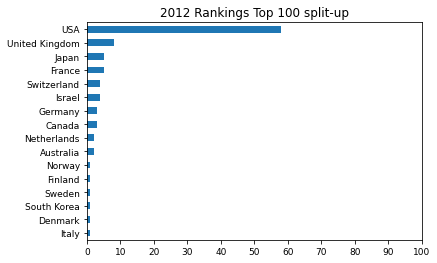

In [32]:
plt.figure()
x=cwur[cwur.year==2012]['country'][:100].value_counts().sort_values()
x.plot(kind='barh',xticks=[0,10,20,30,40,50,60,70,80,90,100],xlim=(0,100),fontsize=9)
plt.title('2012 Rankings Top 100 split-up')
plt.show()

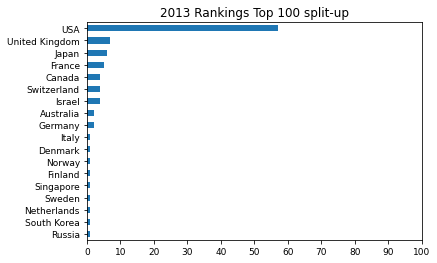

In [33]:
plt.figure()
x=cwur[cwur.year==2013]['country'][:100].value_counts().sort_values()
x.plot(kind='barh',xticks=[0,10,20,30,40,50,60,70,80,90,100],xlim=(0,100),fontsize=9)
plt.title('2013 Rankings Top 100 split-up')
plt.show()

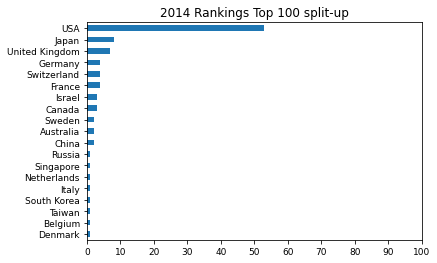

In [34]:
plt.figure()
x=cwur[cwur.year==2014]['country'][:100].value_counts().sort_values()
x.plot(kind='barh',xticks=[0,10,20,30,40,50,60,70,80,90,100],xlim=(0,100),fontsize=9)
plt.title('2014 Rankings Top 100 split-up')
plt.show()

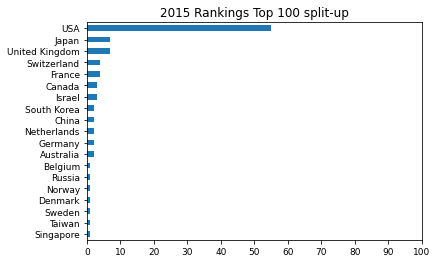

In [35]:
plt.figure()
x=cwur[cwur.year==2015]['country'][:100].value_counts().sort_values()
x.plot(kind='barh',xticks=[0,10,20,30,40,50,60,70,80,90,100],xlim=(0,100),fontsize=9)
plt.title('2015 Rankings Top 100 split-up')
plt.show()

# Plotting the universities from each country

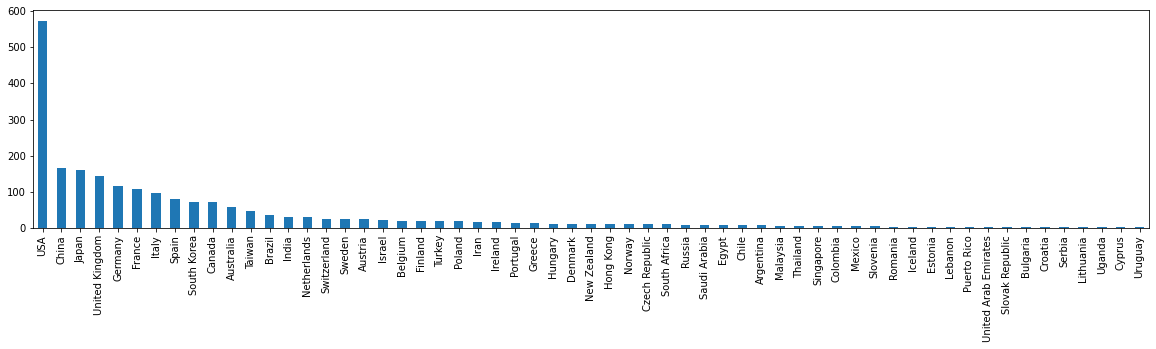

In [36]:
f,ax=plt.subplots(1,1,figsize=(20,4))
cwur['country'].value_counts().plot(kind='bar')

# Correlation Graph

Text(0.5, 1.0, 'Correlation Graph')

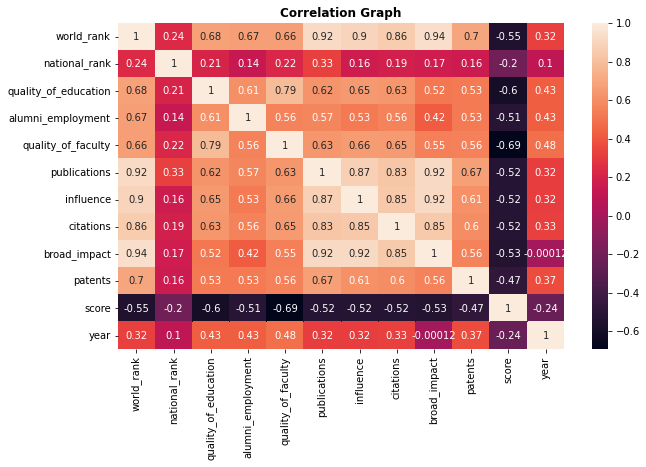

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(cwur.corr(), annot=True)
plt.title("Correlation Graph", fontweight="bold")

# Plotting top 20 universities in the world


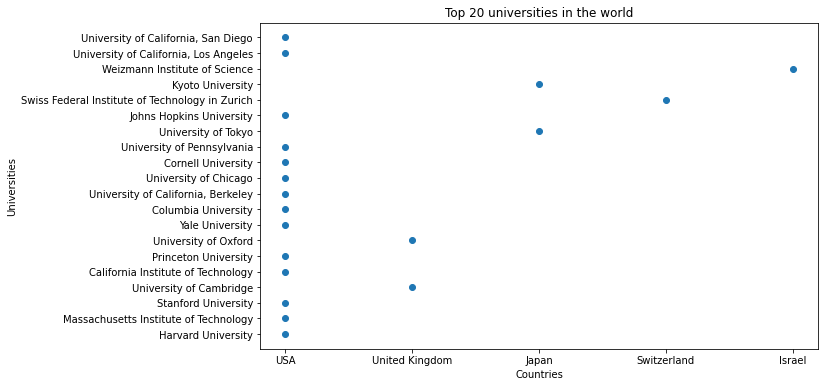

In [38]:
top_20=cwur.head(20)
f,ax=plt.subplots(1,1,figsize=(10,6))
plt.scatter(top_20.country,top_20.institution,) 
plt.xlabel('Countries')
plt.ylabel('Universities')
plt.title('Top 20 universities in the world')
plt.show()

# Quality of Education vs Alumni employment

In [40]:
df = cwur.iloc[:30, :];
cols_to_norm = ['quality_of_education','alumni_employment']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
quality_of_education = go.Scatter(
                    x = df.world_rank,
                    y = df.quality_of_education+1.5,
                    mode = "lines",
                    name = "quality_of_education",
                    marker = dict(color = 'rgb(16, 112, 2, 0.8)'),
                    text = df.institution);
alumni_employment = go.Scatter(
                    x = df.world_rank,
                    y = df.alumni_employment+1.5,
                    mode = "lines+markers",
                    name = "alumni_employment",
                    marker = dict(color = 'rgb(80, 26, 80, 0.8)'),
                    text = df.institution);

data = [quality_of_education,alumni_employment];
layout = dict(title = "Quality of education and alumni employment vs Top 20 Universities",width=700, height=400,
             legend=dict(yanchor="top",y=0.9,xanchor="left",x=0),
             xaxis = dict(title = "World Rank", ticklen = 5, zeroline = False,showgrid=False),
             yaxis=dict(showgrid=False,showticklabels=False,showline= True,autorange=False,
        range=[0,4.5]));
fig = dict(data = data, layout = layout);
iplot(fig)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Publications vs Citations

In [42]:
df = cwur.iloc[:40, :];
cols_to_norm = ['publications','citations']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
publications = go.Scatter(
                    x = df.world_rank,
                    y = df.publications+1.4,
                    mode = "lines",
                    name = "publications",
                    marker = dict(color = 'rgb(16, 112, 2, 0.8)'),
                    text = df.institution);

citations = go.Scatter(
                    x = df.world_rank,
                    y = df.citations+1.4,
                    mode = "lines+markers",
                    name = "citations",
                    marker = dict(color = 'rgb(80, 26, 80, 0.8)'),
                    text = df.institution);

data = [publications, citations];
layout = dict(title = "Publications and Citations vs World Rank of Top 20 Universities",width=700, height=400,
             legend=dict(yanchor="top",y=0.9,xanchor="left",x=0),
             xaxis = dict(title = "World Rank", ticklen = 5, zeroline = False,showgrid=False),
             yaxis=dict(showgrid=False,showticklabels=False,showline= True,autorange=False,
        range=[0,6]));

fig = go.Figure(data = data, layout = layout);
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Radar Plot

In [47]:
countries=cwur.country.unique()
country_dict=defaultdict(list)
cols_to_norm = ['quality_of_education','alumni_employment']
for i in countries:
  cond=cwur.country==i;
  df_country = cwur[cond]
  country_dict[i].append(1/df_country['quality_of_education'].mean())
  country_dict[i].append(1/df_country['citations'].mean())
  country_dict[i].append(1/df_country['publications'].mean())
  country_dict[i].append(1/df_country['alumni_employment'].mean())
  country_dict[i].append(1/df_country['quality_of_faculty'].mean())
fig = go.Figure(
    data=[
        go.Scatterpolar(r=country_dict['USA'], theta=['quality_of_education','citations','publications',
           'alumni_employment','quality_of_faculty'], fill='toself', name='USA'),
        go.Scatterpolar(r=country_dict['China'], theta=['quality_of_education','citations','publications',
           'alumni_employment','quality_of_faculty'], fill='toself', name='China'),
        go.Scatterpolar(r=country_dict['Japan'], theta=['quality_of_education','citations','publications',
           'alumni_employment','quality_of_faculty'], fill='toself', name='Japan'),
        go.Scatterpolar(r=country_dict['United Kingdom'], theta=['quality_of_education','citations','publications',
           'alumni_employment','quality_of_faculty'], fill='toself', name='United Kingdom')
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 0.0080]
    )),
    legend=dict(
    yanchor="top",
    y=0.9,
    xanchor="left",
    x=0.76
)
)
fig.show()

In [49]:
years=cwur.year.unique()
country_dict=defaultdict(list)
cols_to_norm = ['quality_of_education','alumni_employment','citations','publications']
for i in years:
  df_country = cwur[(cwur['country']=='USA') & (cwur['year']==i)]
  country_dict[i].append(df_country['quality_of_education'].mean())
  country_dict[i].append(df_country['citations'].mean())
  country_dict[i].append(df_country['publications'].mean())
  country_dict[i].append(df_country['alumni_employment'].mean())
  country_dict[i].append(df_country['quality_of_faculty'].mean())

categories=['quality_of_education','citations','publications',
           'alumni_employment','quality_of_faculty']

# 2012 and 2013
fig1 = go.Figure(
    data=[
        go.Scatterpolar(r=country_dict[2012], theta=categories, fill='toself', name='2012'),
        go.Scatterpolar(r=country_dict[2013], theta=categories, fill='toself', name='2013'),
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
fig1.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 80]
    )),
    legend=dict(
    yanchor="top",
    y=0.9,
    xanchor="left",
    x=0.76
)
)
fig1.show()

#####################
# 2014 and 2015
fig2 = go.Figure(
    data=[
        go.Scatterpolar(r=country_dict[2014], theta=categories, fill='toself', name='2014'),
        go.Scatterpolar(r=country_dict[2015], theta=categories, fill='toself', name='2015'),
    ],
    layout=go.Layout(
        #title=go.layout.Title(text='Yearly comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
fig2.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 500]
    )),
    legend=dict(
    yanchor="top",
    y=0.9,
    xanchor="left",
    x=0.76
)
)
fig2.show()

############
# 2013,2014, and 2015
fig3= go.Figure(
    data=[
        go.Scatterpolar(r=country_dict[2013], theta=categories, fill='toself', name='2013'),
        go.Scatterpolar(r=country_dict[2014], theta=categories, fill='toself', name='2014'),
        go.Scatterpolar(r=country_dict[2015], theta=categories, fill='toself', name='2015'),
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
fig3.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 500]
    )),
    legend=dict(
    yanchor="top",
    y=0.9,
    xanchor="left",
    x=0.76
)
)
fig3.show()

# UCSD

In [50]:
UCSD=cwur[(cwur['institution']=='University of California, San Diego')]
cols_to_norm = ['quality_of_education','alumni_employment']
UCSD[cols_to_norm] = StandardScaler().fit_transform(UCSD[cols_to_norm])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
df = UCSD

import plotly.graph_objs as go
trace1 = go.Scatter(
                    x = df.year,
                    y = df.quality_of_education,
                    mode = "lines",
                    name = "quality_of_education",
                    marker = dict(color = 'rgb(16, 112, 2, 0.8)'),
                    text = df.year);

trace2 = go.Scatter(
                    x = df.year,
                    y = df.alumni_employment,
                    mode = "lines+markers",
                    name = "alumni_employment",
                    marker = dict(color = 'rgb(80, 26, 80, 0.8)'),
                    text = df.year);
init_notebook_mode(connected=True) 
data = [trace1, trace2];
layout = dict(title = "Quality of education and Alumni Employment vs Year",
             xaxis = dict(title = "UCSD", ticklen = 4,tickformat=',d', zeroline = False));
fig = go.Figure(data = data, layout = layout);


fig.show(renderer="colab")

In [56]:
from collections import defaultdict
years=cwur.year.unique()
UCSD_dict=defaultdict(list)
cols_to_norm = ['quality_of_education','alumni_employment','citations','publications']
UCSD1=cwur[(cwur['institution']=='University of California, San Diego')]
for i in years:
  df_UCSD = UCSD1[(UCSD1['year']==i)]
  UCSD_dict[i].append(1/df_UCSD['quality_of_education'].mean())
  UCSD_dict[i].append(1/df_UCSD['citations'].mean())
  UCSD_dict[i].append(1/df_UCSD['publications'].mean())
  UCSD_dict[i].append(1/df_UCSD['alumni_employment'].mean())
  UCSD_dict[i].append(1/df_UCSD['quality_of_faculty'].mean())

categories=['quality_of_education','citations','publications',
           'alumni_employment','quality_of_faculty']
fig1 = go.Figure(
    data=[
        go.Scatterpolar(r=UCSD_dict[2012], theta=categories, fill='toself', name='2012'),
        go.Scatterpolar(r=UCSD_dict[2013], theta=categories, fill='toself', name='2013'),
        go.Scatterpolar(r=UCSD_dict[2014], theta=categories, fill='toself', name='2014'),
        go.Scatterpolar(r=UCSD_dict[2015], theta=categories, fill='toself', name='2015'),
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
fig1.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0,0.14]
    )),
    legend=dict(
    yanchor="top",
    y=0.9,
    xanchor="left",
    x=0.76
)
)
fig1.show(renderer="colab")